# Project 3
## Group Member: <br>
Michael Wu<br>
Clara Lee<br>
Evelyn Chan<br>
Joey Besgen<br>

In [1]:
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import misc
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
import pickle
%matplotlib inline

Using TensorFlow backend.
/Applications/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
test_img_fnames = os.listdir('data/data/test')
train_img_fnames = os.listdir('data/data/train')

# Load in the data
First we need to write a function to load into memory each of the images, and then resize them to (224, 224, 3). scipy.misc.imread and scipy.misc.imresize will be useful for this. You should also rescale the images so that they are on a scale of 0 to 1, meaning each pixel value should be between 0 and 1. This can be achieved by dividing by an appropriate constant.

In [3]:
def load_img(filename):
    #load current image
    current_img = misc.imread(filename)
    #resize current image
    current_img = misc.imresize(current_img,(224,224))
    return current_img

In [4]:
test_imgs = [load_img(os.path.join('data/data/test', fname)) for fname in test_img_fnames]
test_imgs = np.stack(test_imgs)

In [5]:
train_imgs = [load_img(os.path.join('data/data/train', fname)) for fname in train_img_fnames]
train_imgs = np.stack(train_imgs)

In [6]:
with open('data/data/train_labels.pkl', 'rb') as f:
    train_labels = pickle.load(f)

# Load Pretrained VGG network
Now in order to generate the CNN featurizations of our images we need to load a pretrained network. Note that running this network will take a long time on CPU so you can feel free to skip this section and just load the featurizations I provided in the next section

In [ ]:
VGG16 = keras.applications.vgg16.VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [ ]:
VGG16.summary()

In [ ]:
featurized_training_data = VGG16.predict(train_imgs, verbose=1)

In [ ]:
featurized_test_data = VGG16.predict(test_imgs, verbose=1)

In [ ]:
# Save featurizations
import pickle
with open('featurized_train_imgs.pkl', 'wb') as f:
    pickle.dump(featurized_training_data, f)
with open('featurized_test_imgs.pkl', 'wb') as f:
    pickle.dump(featurized_test_data, f)

# Load featurizations

In [7]:
import pickle
with open('data/featurized_train_imgs.pkl', 'rb') as f:
    featurized_training_data = pickle.load(f)
with open('data/featurized_test_imgs.pkl', 'rb') as f:
    featurized_test_data = pickle.load(f)

# Create you network
Now we need to create a network to take in the featurizations and output a label of dog or not dog. To do this you should use Keras' Sequential model. We will need to flatten our (7,7,512) feature input into a vector (HINT: lookup flatten in keras documentation) and then add a Dense layer with some number of neurons (play around with the number of neurons to improve your performance). Then finally we need a Dense layer with 1 neuron and a sigmoid activation to represent our label output. You might want to use more or less model.add calls than have been provided

In [8]:
model = Sequential()
model.add(Flatten(input_shape = (7, 7, 512)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                401424    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 401,713
Trainable params: 401,713
Non-trainable params: 0
_________________________________________________________________


# Now we need to train the network
You need to compile the model first, and then use the fit function. You should use binary crossentropy as your loss.

In [10]:
model.compile(optimizer = 'SGD' ,loss = 'binary_crossentropy')

In [11]:
model.fit(featurized_training_data,train_labels,epochs = 2)

Epoch 1/2
10000/10000 [==============================] - 3s 295us/step - loss: 0.5708
Epoch 2/2
10000/10000 [==============================] - 2s 216us/step - loss: 0.3635


Now we need to predict labels for the test set and output it to file. Use keras predict for this. Remember that the predictions are real values between 0 and 1 and you should be outputting just 0 or 1, not a value between.

In [12]:
predictions = model.predict(featurized_test_data)

In [13]:
with open('test_labels.txt', 'w') as f:
    f.write("Id,Label\n")
    for i, val in enumerate(predictions):
        if val < 0.5:
            prediction = 0
        else:
            prediction = 1
        f.write(str(i))
        f.write('\n')
        f.write(str(prediction))
        f.write('\n')

# Part 2

featurized_training_data
featurized_test_data

In [24]:
from sklearn.decomposition import PCA

Now we want to run PCA on our images and our featurizations to see the difference. To save time we will just run it on the first 500 images. Take the first 500 images and 500 featurizations and reshape them into shape (500, x).

In [29]:
original_imgs = test_imgs[:500].reshape((500,-1))
featurized = featurized_training_data[:500].reshape((500,-1))

Run PCA with 2 components on the original images

In [31]:
pca_orig = PCA(n_components = 2)
pca_orig.fit(original_imgs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Run PCA with 2 components on the featurizations

In [32]:
pca_featurized = PCA(2).fit(featurized)

Project the original images and featurizations onto the 2 principal components. (HINT: look at the PCA.transform function)

In [34]:
projected_orig_imgs = pca_orig.transform(original_imgs)
projected_featurized = pca_featurized.transform(featurized)

Find the indices of the labels that are cats and the indices that are dogs. np.where will make this very easy

In [42]:
labels = train_labels[:500]
cat_inds = np.where(labels == 1)
dog_inds = np.where(labels == 0)

Plot the PCA of the original images and the PCA of the featurization

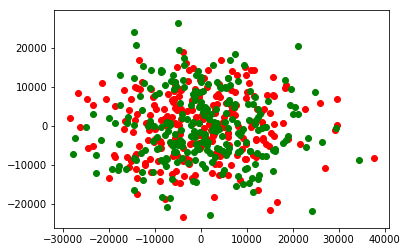

In [43]:
plt.scatter(projected_orig_imgs[cat_inds ,0], projected_orig_imgs[cat_inds, 1], c='red')
plt.scatter(projected_orig_imgs[dog_inds, 0], projected_orig_imgs[dog_inds, 1], c='green')

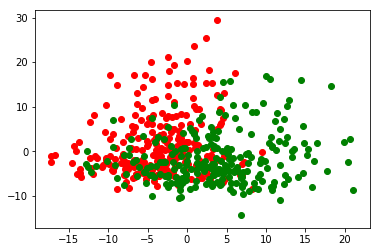

In [44]:
plt.scatter(projected_featurized[cat_inds ,0], projected_featurized[cat_inds, 1], c='red')
plt.scatter(projected_featurized[dog_inds, 0], projected_featurized[dog_inds, 1], c='green')

#### Question 1: Describe the differences you see between the two plots in terms of the clustering of the classes?
The first plot has more overlap between the green and red dots while the second plot has more differentiation

#### Question 2: Based on your answer to Question 1, desccribe why it is useful to featurize with a CNN before training a fully connnected model to classify the images.
It is useful to featurize with a CNN before training so that we can separate the data such that our result will be like the second plot, having distinct areas in which each value belongs to. 